In [223]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [224]:
df = pd.read_csv('/Users/liu/Desktop/conversion_data.csv')

## DATA CLEANING


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

Here is no missing values.

In [226]:
df.head(10)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
5,5,6,South America,organic,M,2,2,1,1,0,...,45,29,20,56,5,2,4,5,5,0
6,6,7,North America,instagram,M,1,1,0,5,5,...,53,55,33,45,1,3,5,7,3,1
7,7,8,Australia,youtube,F,2,1,6,0,0,...,39,22,33,55,2,1,3,5,4,0
8,8,9,Europe,youtube,M,4,2,0,0,3,...,41,42,39,36,4,3,4,7,1,0
9,9,10,Asia,organic,M,3,1,0,0,0,...,31,37,40,44,1,3,6,3,7,0


In [227]:
df.describe()

,Unnamed: 0,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1000.500000,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,2.970885,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,1.148805,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,1.970000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,2.965000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,3.960000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,1999.000000,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,5.000000,5.000000,4.990000,...,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [228]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [229]:
# Drop irrelevant columns
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.dropna()  # Drop rows with missing values
df = df.drop_duplicates()

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

We can see there is no dupilicates and missing values

### Clean outliers

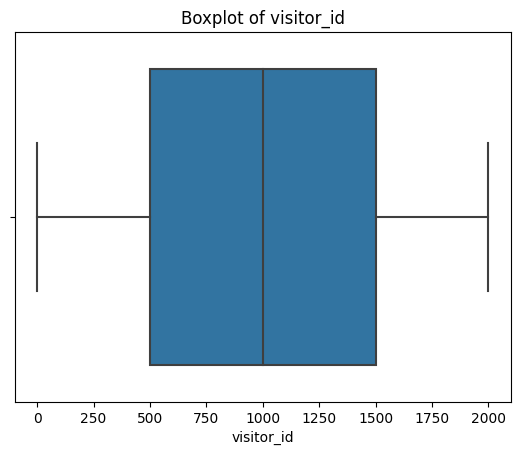

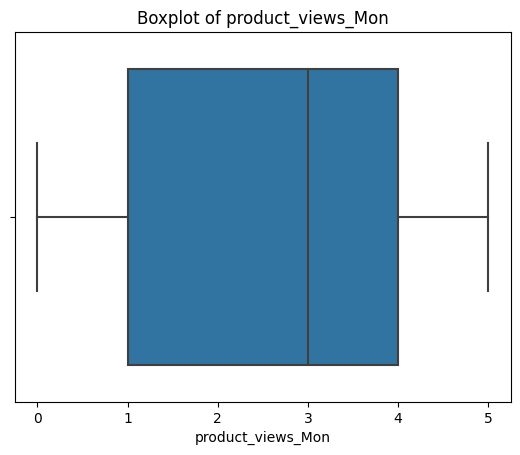

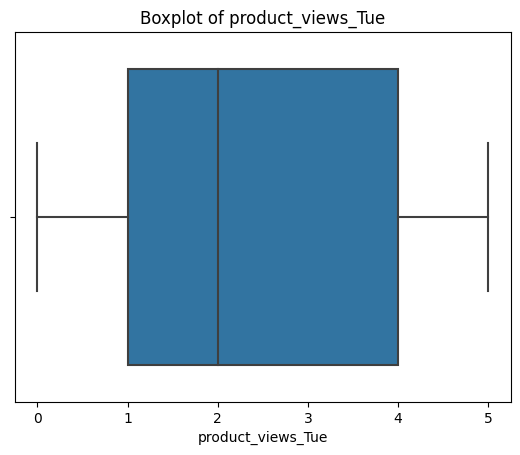

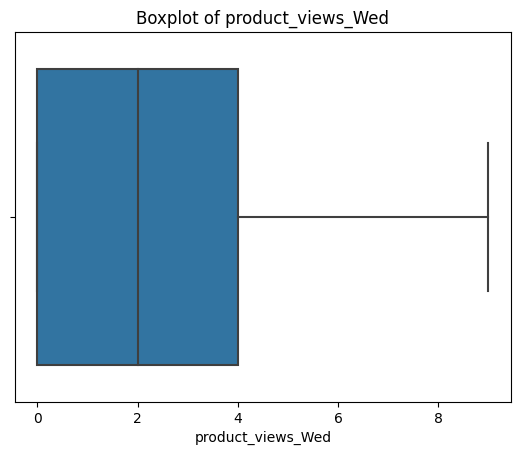

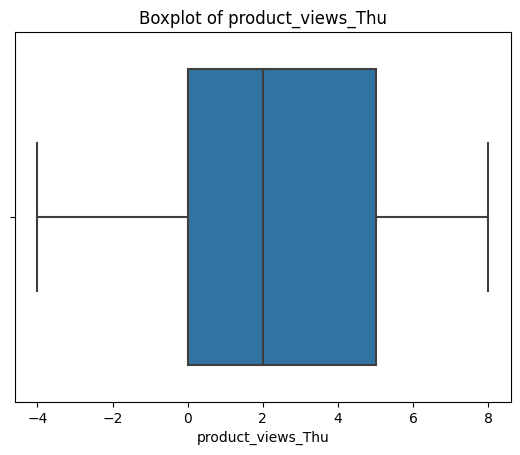

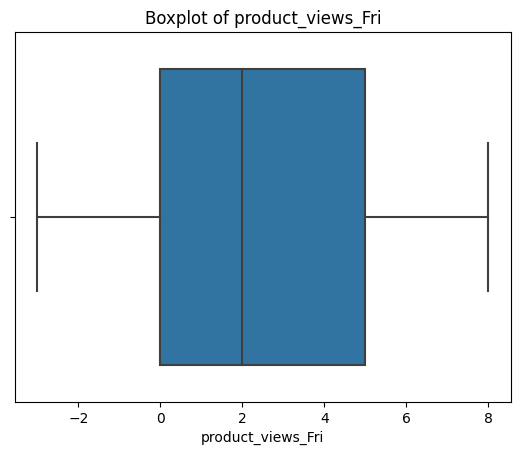

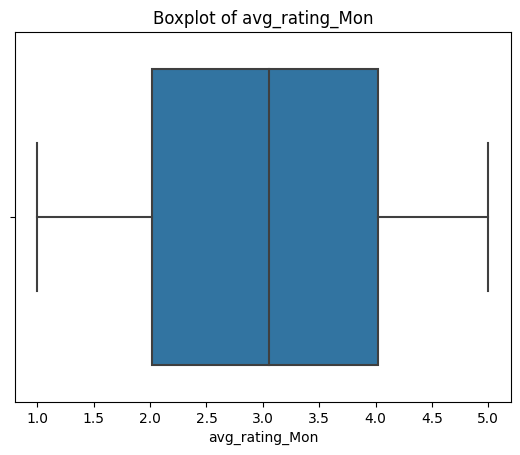

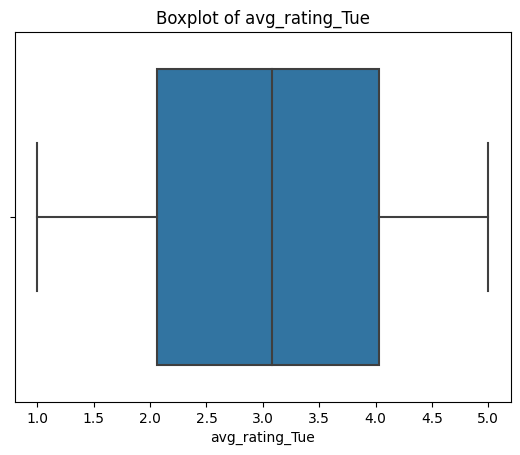

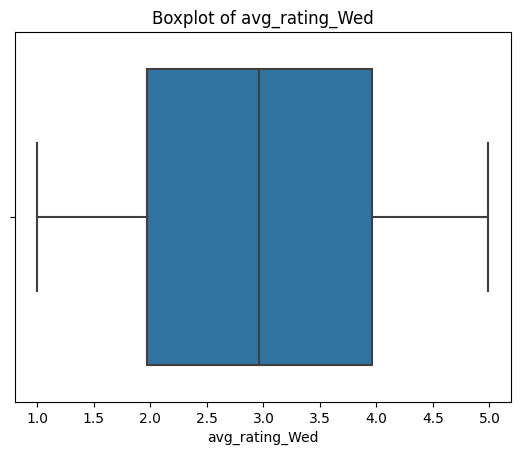

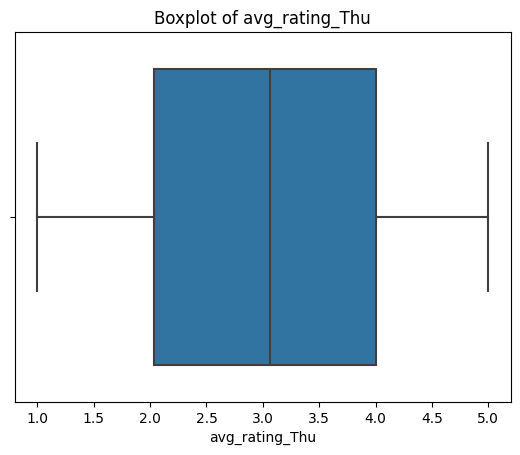

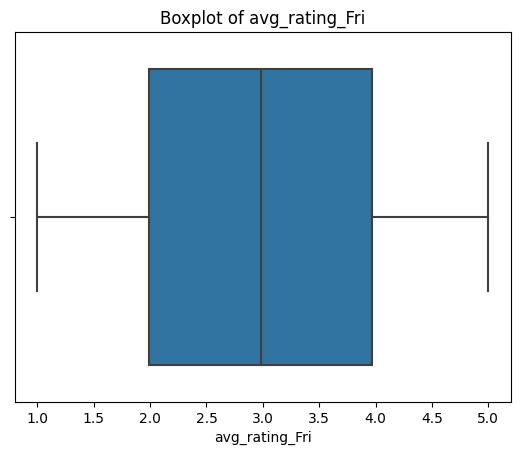

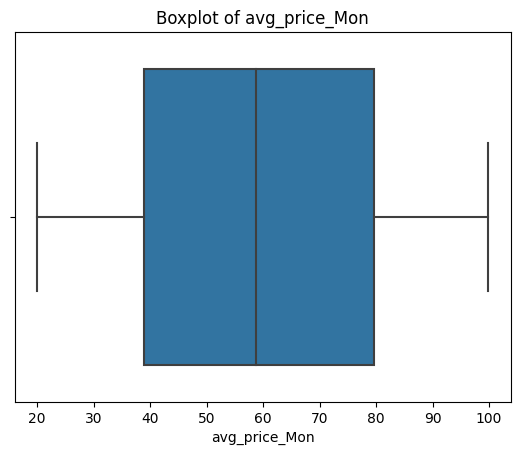

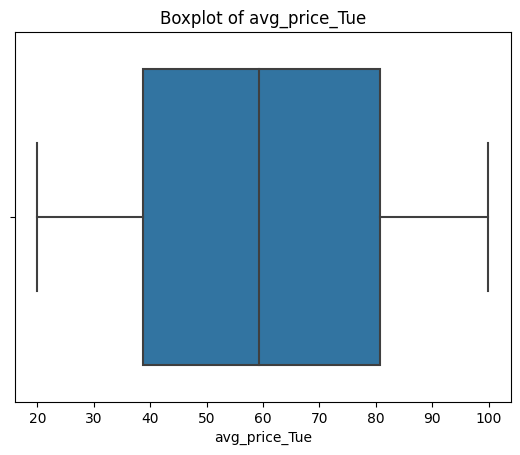

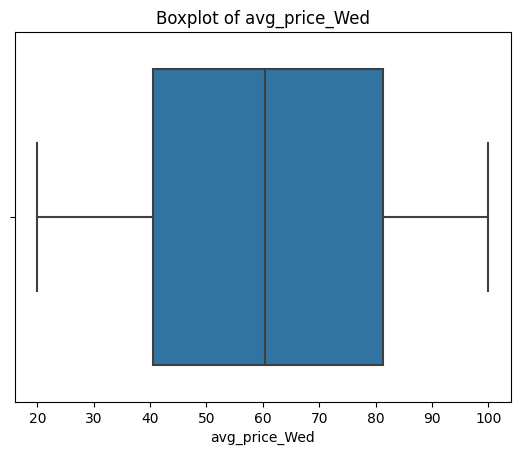

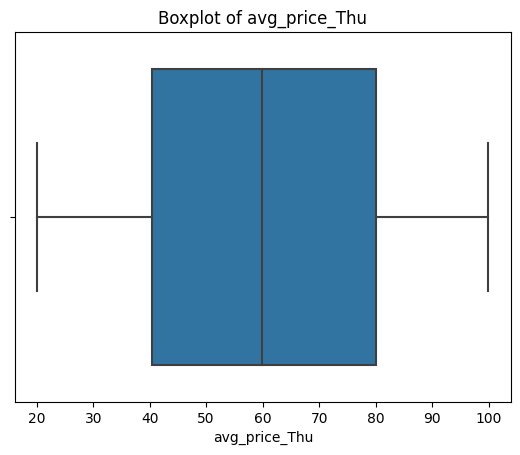

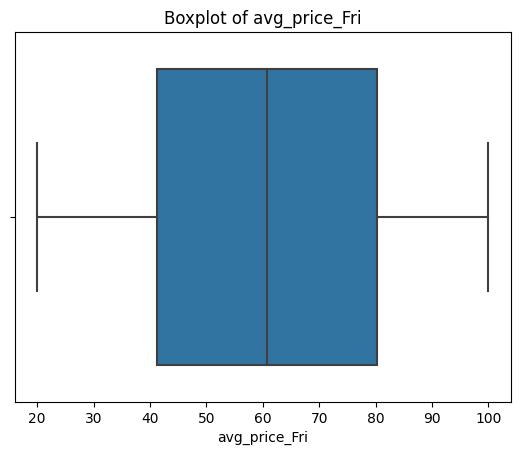

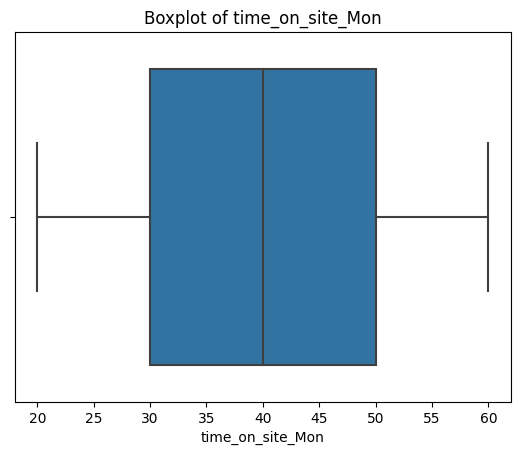

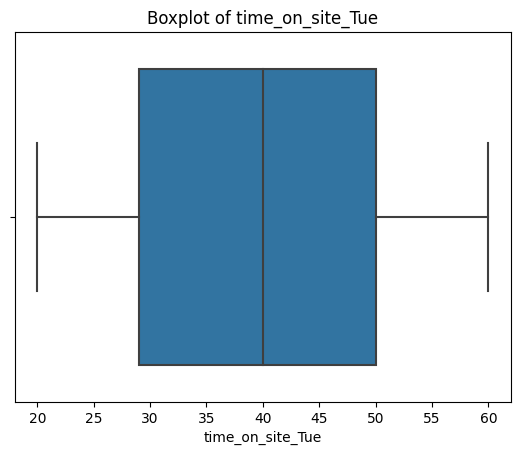

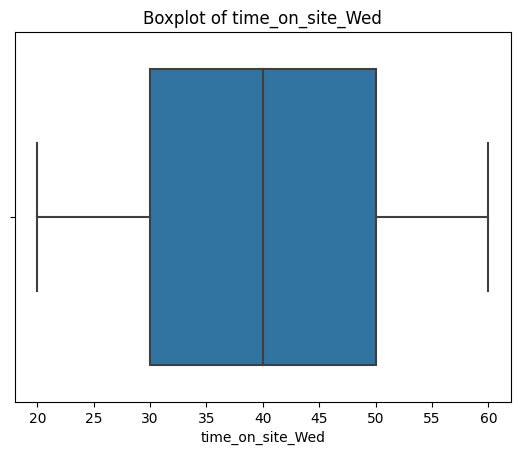

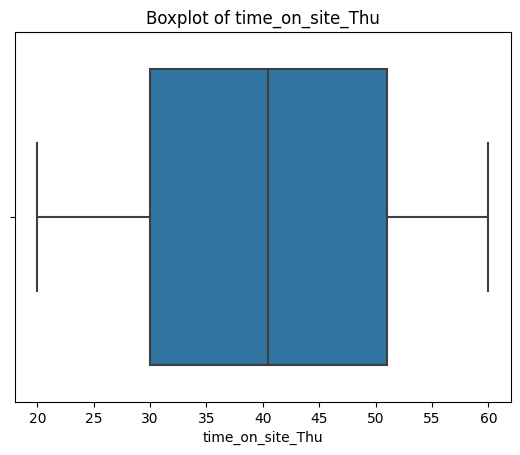

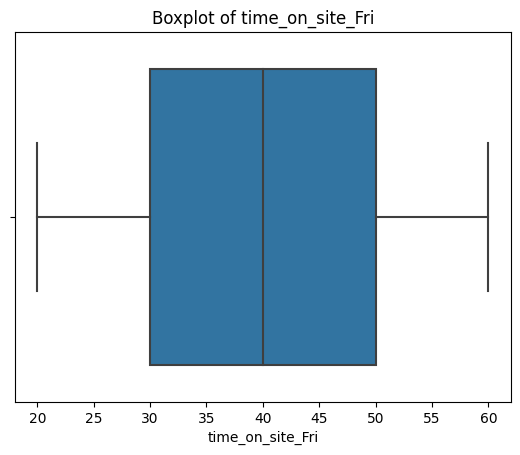

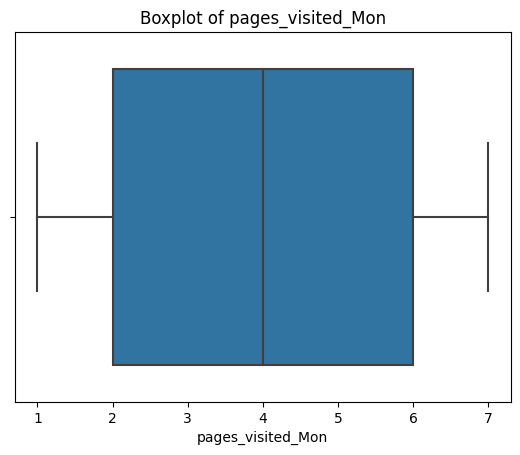

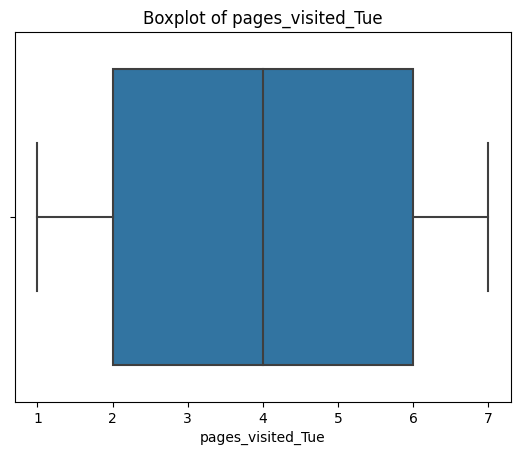

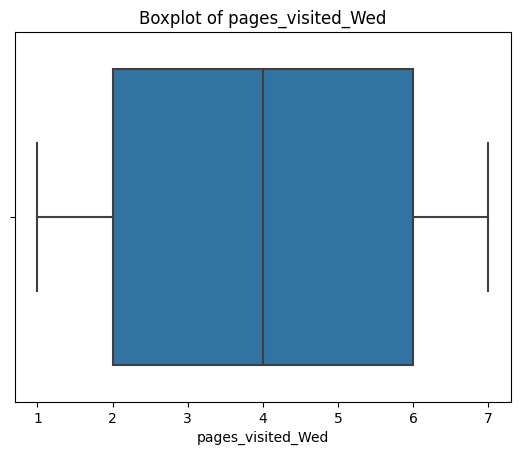

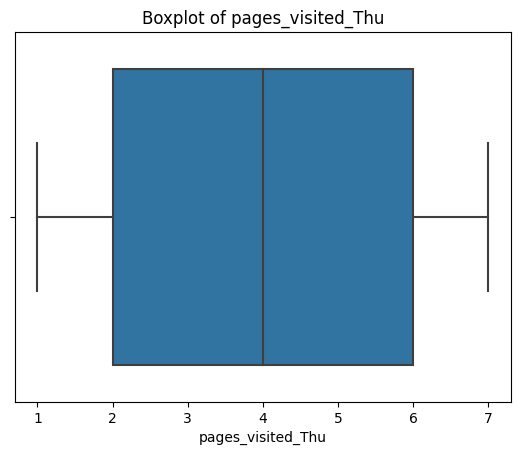

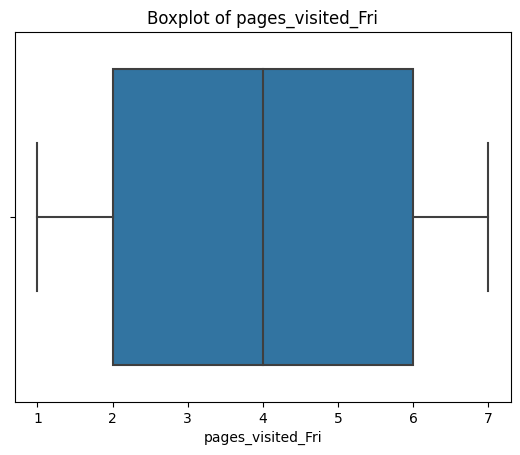

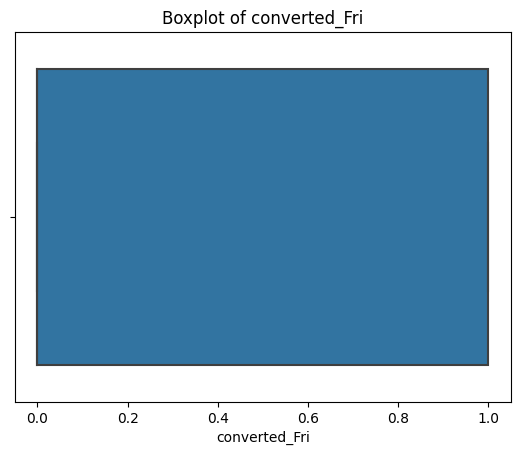

In [231]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [232]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

<Axes: xlabel='pages_visited_Mon', ylabel='Count'>

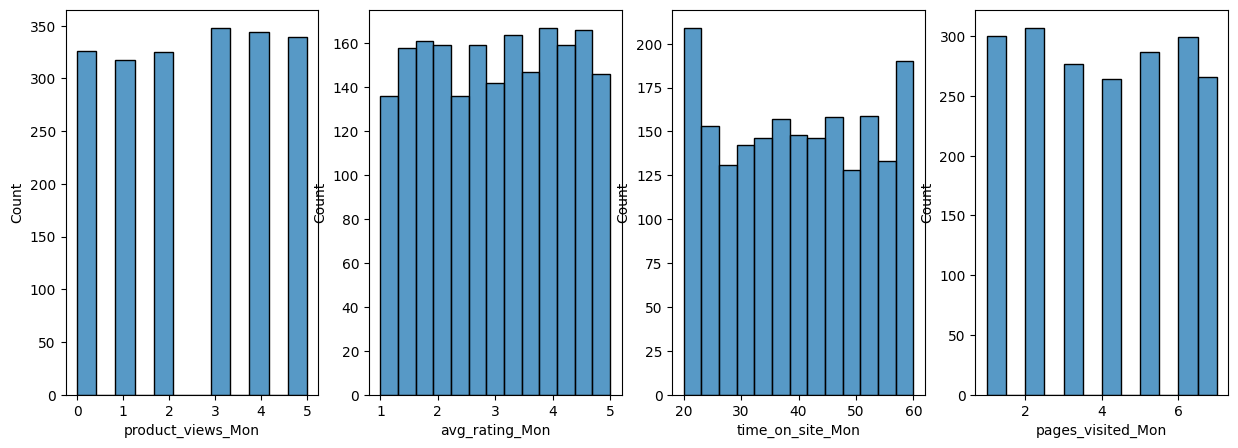

In [233]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.histplot(df['product_views_Mon'], ax=ax1)
sns.histplot(df['avg_rating_Mon'], ax=ax2)
sns.histplot(df['time_on_site_Mon'], ax=ax3)
sns.histplot(df['pages_visited_Mon'], ax=ax4)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Mon'>

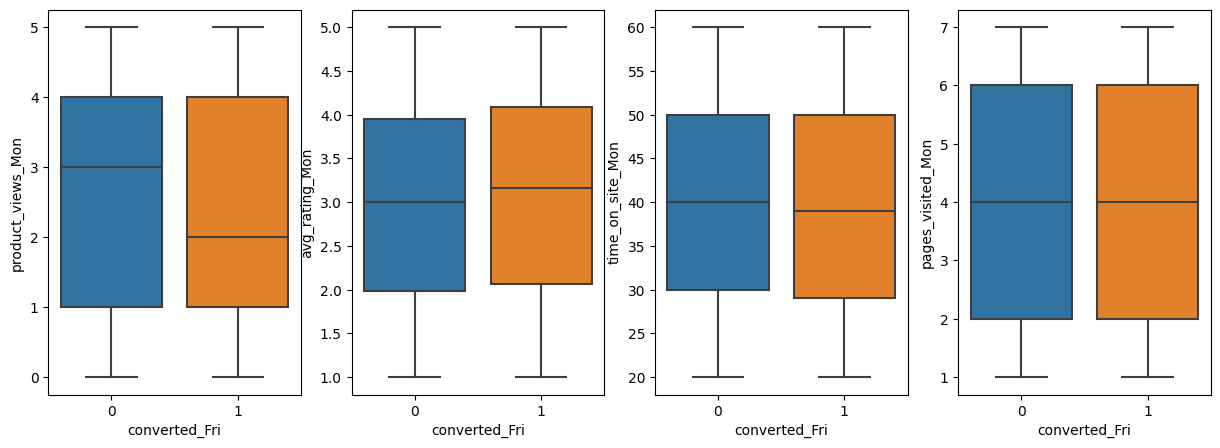

In [234]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Mon', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Mon',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Mon', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Mon', data=df, ax=ax4)

<Axes: xlabel='pages_visited_Tue', ylabel='Count'>

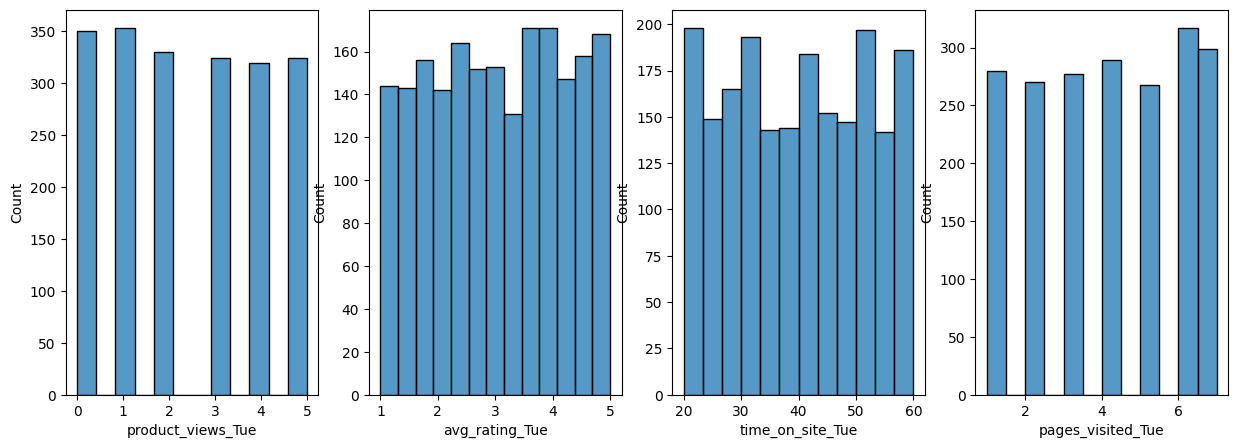

In [235]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.histplot(df['product_views_Tue'], ax=ax1)
sns.histplot(df['avg_rating_Tue'], ax=ax2)
sns.histplot(df['time_on_site_Tue'], ax=ax3)
sns.histplot(df['pages_visited_Tue'], ax=ax4)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Tue'>

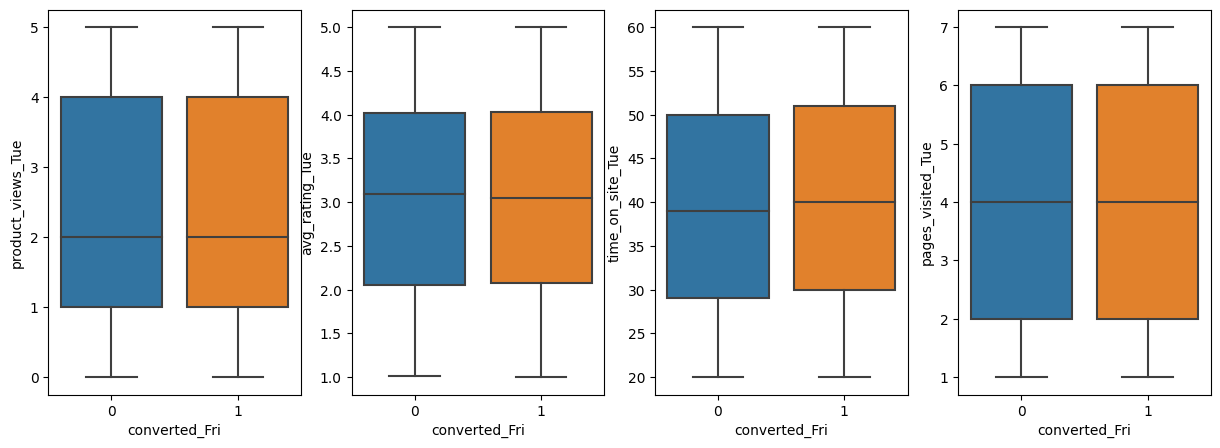

In [236]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Tue', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Tue',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Tue', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Tue', data=df, ax=ax4)

<Axes: xlabel='pages_visited_Wed', ylabel='Count'>

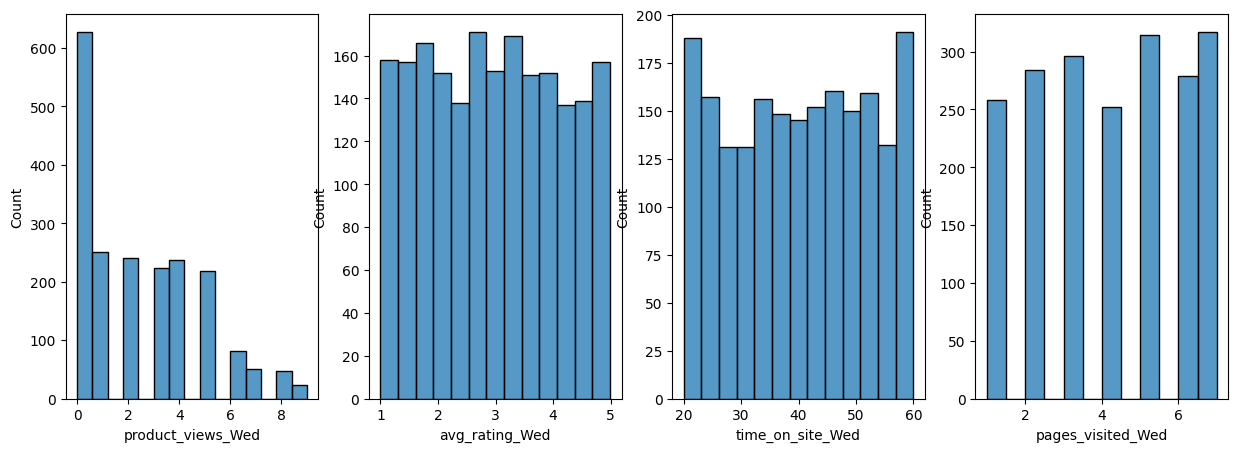

In [237]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.histplot(df['product_views_Wed'], ax=ax1)
sns.histplot(df['avg_rating_Wed'], ax=ax2)
sns.histplot(df['time_on_site_Wed'], ax=ax3)
sns.histplot(df['pages_visited_Wed'], ax=ax4)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Wed'>

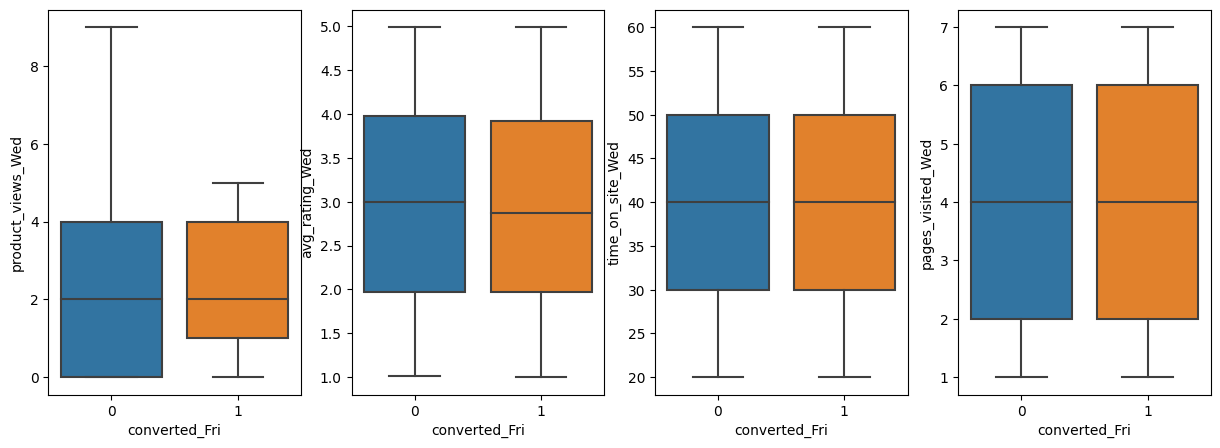

In [238]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Wed', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Wed',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Wed', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Wed', data=df, ax=ax4)

<Axes: xlabel='pages_visited_Thu', ylabel='Count'>

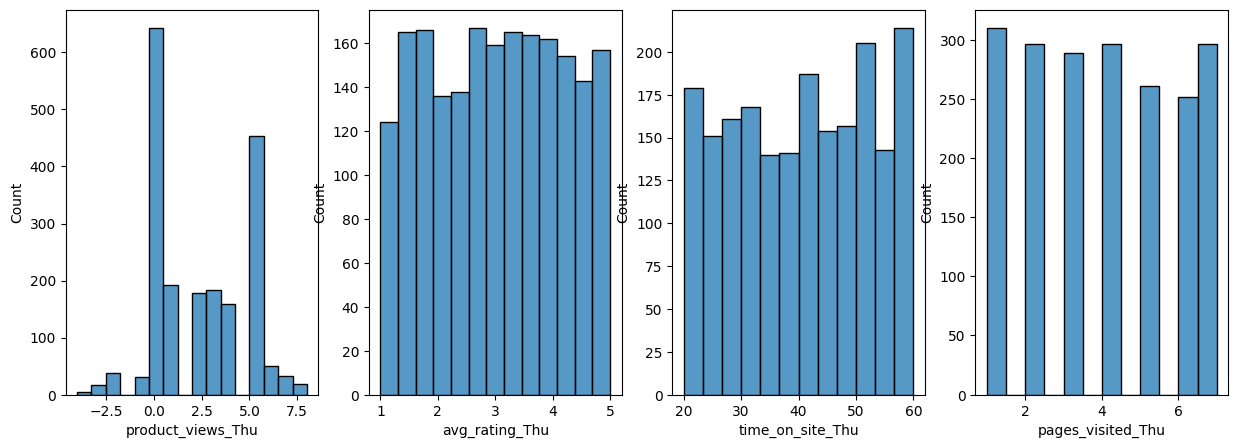

In [239]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.histplot(df['product_views_Thu'], ax=ax1)
sns.histplot(df['avg_rating_Thu'], ax=ax2)
sns.histplot(df['time_on_site_Thu'], ax=ax3)
sns.histplot(df['pages_visited_Thu'], ax=ax4)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Thu'>

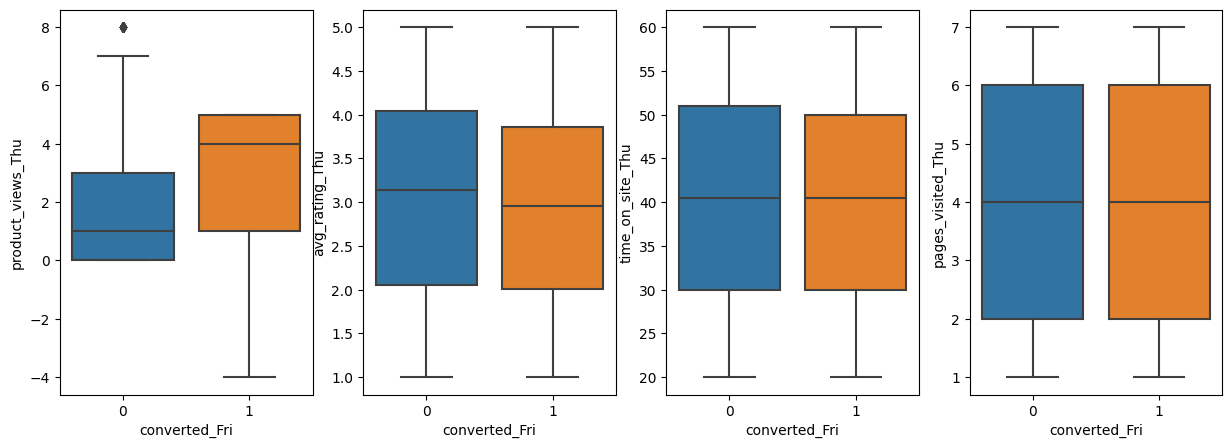

In [240]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Thu', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Thu',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Thu', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Thu', data=df, ax=ax4)

<Axes: xlabel='pages_visited_Fri', ylabel='Count'>

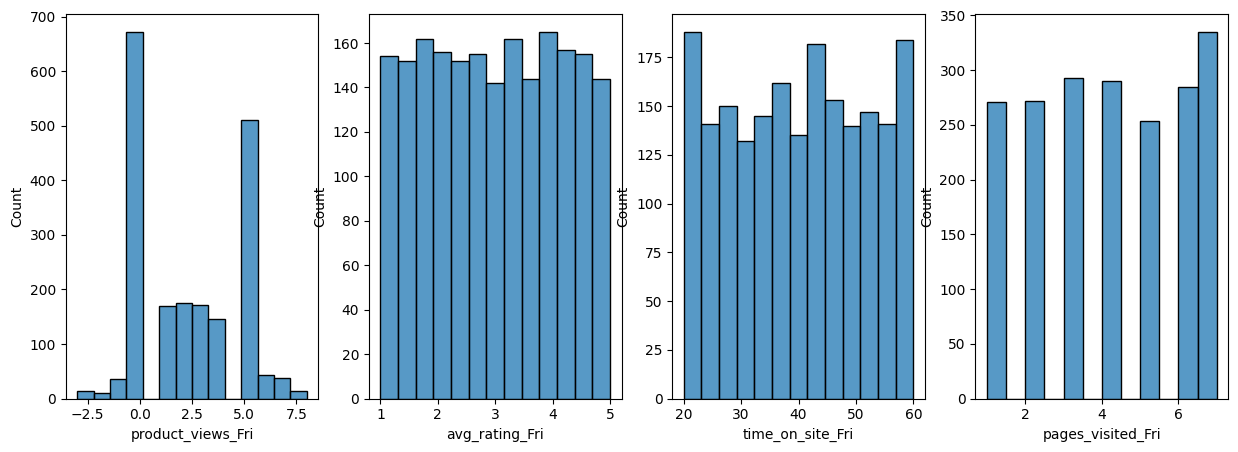

In [241]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.histplot(df['product_views_Fri'], ax=ax1)
sns.histplot(df['avg_rating_Fri'], ax=ax2)
sns.histplot(df['time_on_site_Fri'], ax=ax3)
sns.histplot(df['pages_visited_Fri'], ax=ax4)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

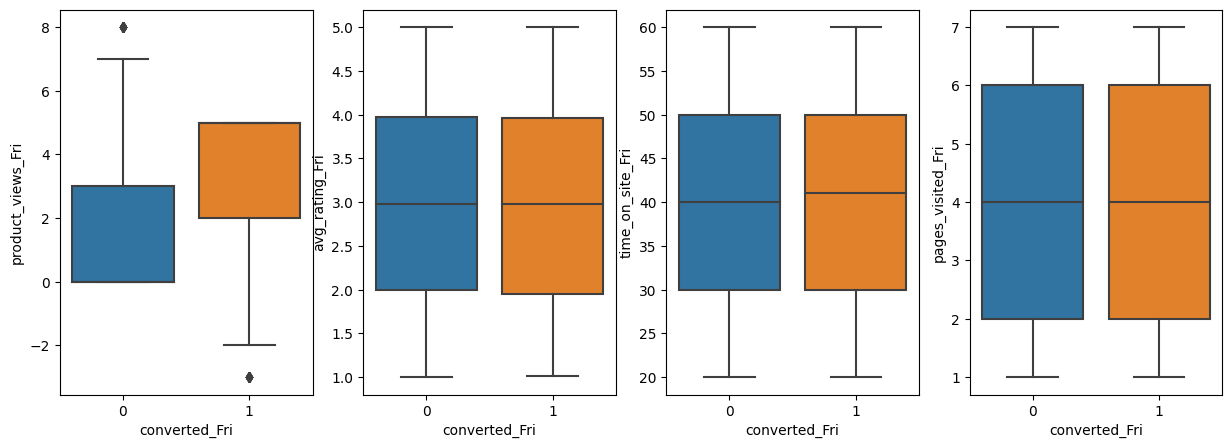

In [242]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
sns.boxplot(x='converted_Fri',y='product_views_Fri', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_rating_Fri',data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='time_on_site_Fri', data=df, ax=ax3)
sns.boxplot(x='converted_Fri',y='pages_visited_Fri', data=df, ax=ax4)

## Initial Hypothesis
Product_ view_on_Thru and Product_ view_on_Fri seem to be strong predictors of the 'converted_Fri'


In [243]:
df.groupby(['gender','converted_Fri'])['visitor_id'].count().unstack()
#unstack to put data into a metric

converted_Fri,0,1
gender,,
F,602,491
M,654,253


In [244]:
df.groupby(['visitor_location','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
visitor_location,,
Asia,231,138
Australia,268,135
Europe,235,148
North America,267,145
South America,255,178


In [245]:
df.groupby(['marketing_channel','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
marketing_channel,,
facebook,238,156
google,234,165
instagram,257,174
organic,311,96
youtube,216,153


In [246]:
for i in ['gender', 'visitor_location','marketing_channel']:
    print(df.groupby([i, 'converted_Fri'])['visitor_id'].count().unstack())

converted_Fri    0    1
gender                 
F              602  491
M              654  253
converted_Fri       0    1
visitor_location          
Asia              231  138
Australia         268  135
Europe            235  148
North America     267  145
South America     255  178
converted_Fri        0    1
marketing_channel          
facebook           238  156
google             234  165
instagram          257  174
organic            311   96
youtube            216  153


###Feature Enginnering


In [247]:
Gender = pd.get_dummies(df['gender'],dtype= int)
new_df = pd.concat([df, Gender], axis=1)
new_df = df.drop(['gender'], axis=1)

In [248]:
Location = pd.get_dummies(df['visitor_location'],dtype= int)
new_df = pd.concat([df, Location], axis=1)
new_df = df.drop(['visitor_location'], axis=1)

In [249]:
Marketing_channel = pd.get_dummies(df['marketing_channel'],dtype= int)
new_df = pd.concat([df, Marketing_channel], axis=1)
new_df = df.drop(['marketing_channel'], axis=1)

In [250]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   gender             2000 non-null   object 
 3   product_views_Mon  2000 non-null   int64  
 4   product_views_Tue  2000 non-null   int64  
 5   product_views_Wed  2000 non-null   int64  
 6   product_views_Thu  2000 non-null   int64  
 7   product_views_Fri  2000 non-null   int64  
 8   avg_rating_Mon     2000 non-null   float64
 9   avg_rating_Tue     2000 non-null   float64
 10  avg_rating_Wed     2000 non-null   float64
 11  avg_rating_Thu     2000 non-null   float64
 12  avg_rating_Fri     2000 non-null   float64
 13  avg_price_Mon      2000 non-null   float64
 14  avg_price_Tue      2000 non-null   float64
 15  avg_price_Wed      2000 non-null   float64
 16  avg_price_Thu      2000 

In [251]:
new_df = pd.concat([df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri']],Gender,Location, Marketing_channel, df['converted_Fri']], axis=1)

In [252]:
new_df

,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,avg_rating_Fri,...,Australia,Europe,North America,South America,facebook,google,instagram,organic,youtube,converted_Fri
0,4,5,2,1,2,3.90,2.19,4.87,3.47,1.24,...,0,0,1,0,0,0,0,0,1,1
1,2,5,0,1,5,1.31,2.16,1.98,3.09,1.80,...,0,0,0,1,0,0,0,1,0,0
2,3,4,0,-3,5,3.26,4.79,3.12,2.58,4.58,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,5,0,2.66,4.79,3.41,2.28,3.36,...,0,0,1,0,1,0,0,0,0,0
4,1,5,2,2,3,2.76,2.38,3.32,1.62,1.74,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,0,0,4,2,4.80,3.98,2.73,2.19,1.34,...,0,1,0,0,0,0,0,1,0,0
1996,1,2,0,4,1,1.34,1.26,1.53,2.61,2.55,...,0,0,0,1,0,1,0,0,0,0
1997,2,3,0,0,8,2.56,4.18,2.17,2.90,4.59,...,0,0,0,0,1,0,0,0,0,0
1998,2,2,2,5,5,4.49,3.00,2.83,4.74,3.25,...,0,0,0,1,0,0,0,0,1,1


                   product_views_Mon  product_views_Tue  product_views_Wed   
product_views_Mon           1.000000           0.010767          -0.027748  \
product_views_Tue           0.010767           1.000000          -0.031678   
product_views_Wed          -0.027748          -0.031678           1.000000   
product_views_Thu          -0.003192           0.005046          -0.003352   
product_views_Fri          -0.001304           0.020120           0.004823   
avg_rating_Mon              0.006839          -0.003503          -0.004358   
avg_rating_Tue              0.012027           0.015646           0.048924   
avg_rating_Wed              0.022865          -0.003250          -0.014667   
avg_rating_Thu             -0.009404          -0.016696           0.010665   
avg_rating_Fri             -0.020431          -0.010379          -0.018085   
avg_price_Mon               0.025676          -0.002759           0.003518   
avg_price_Tue              -0.001783           0.008634         

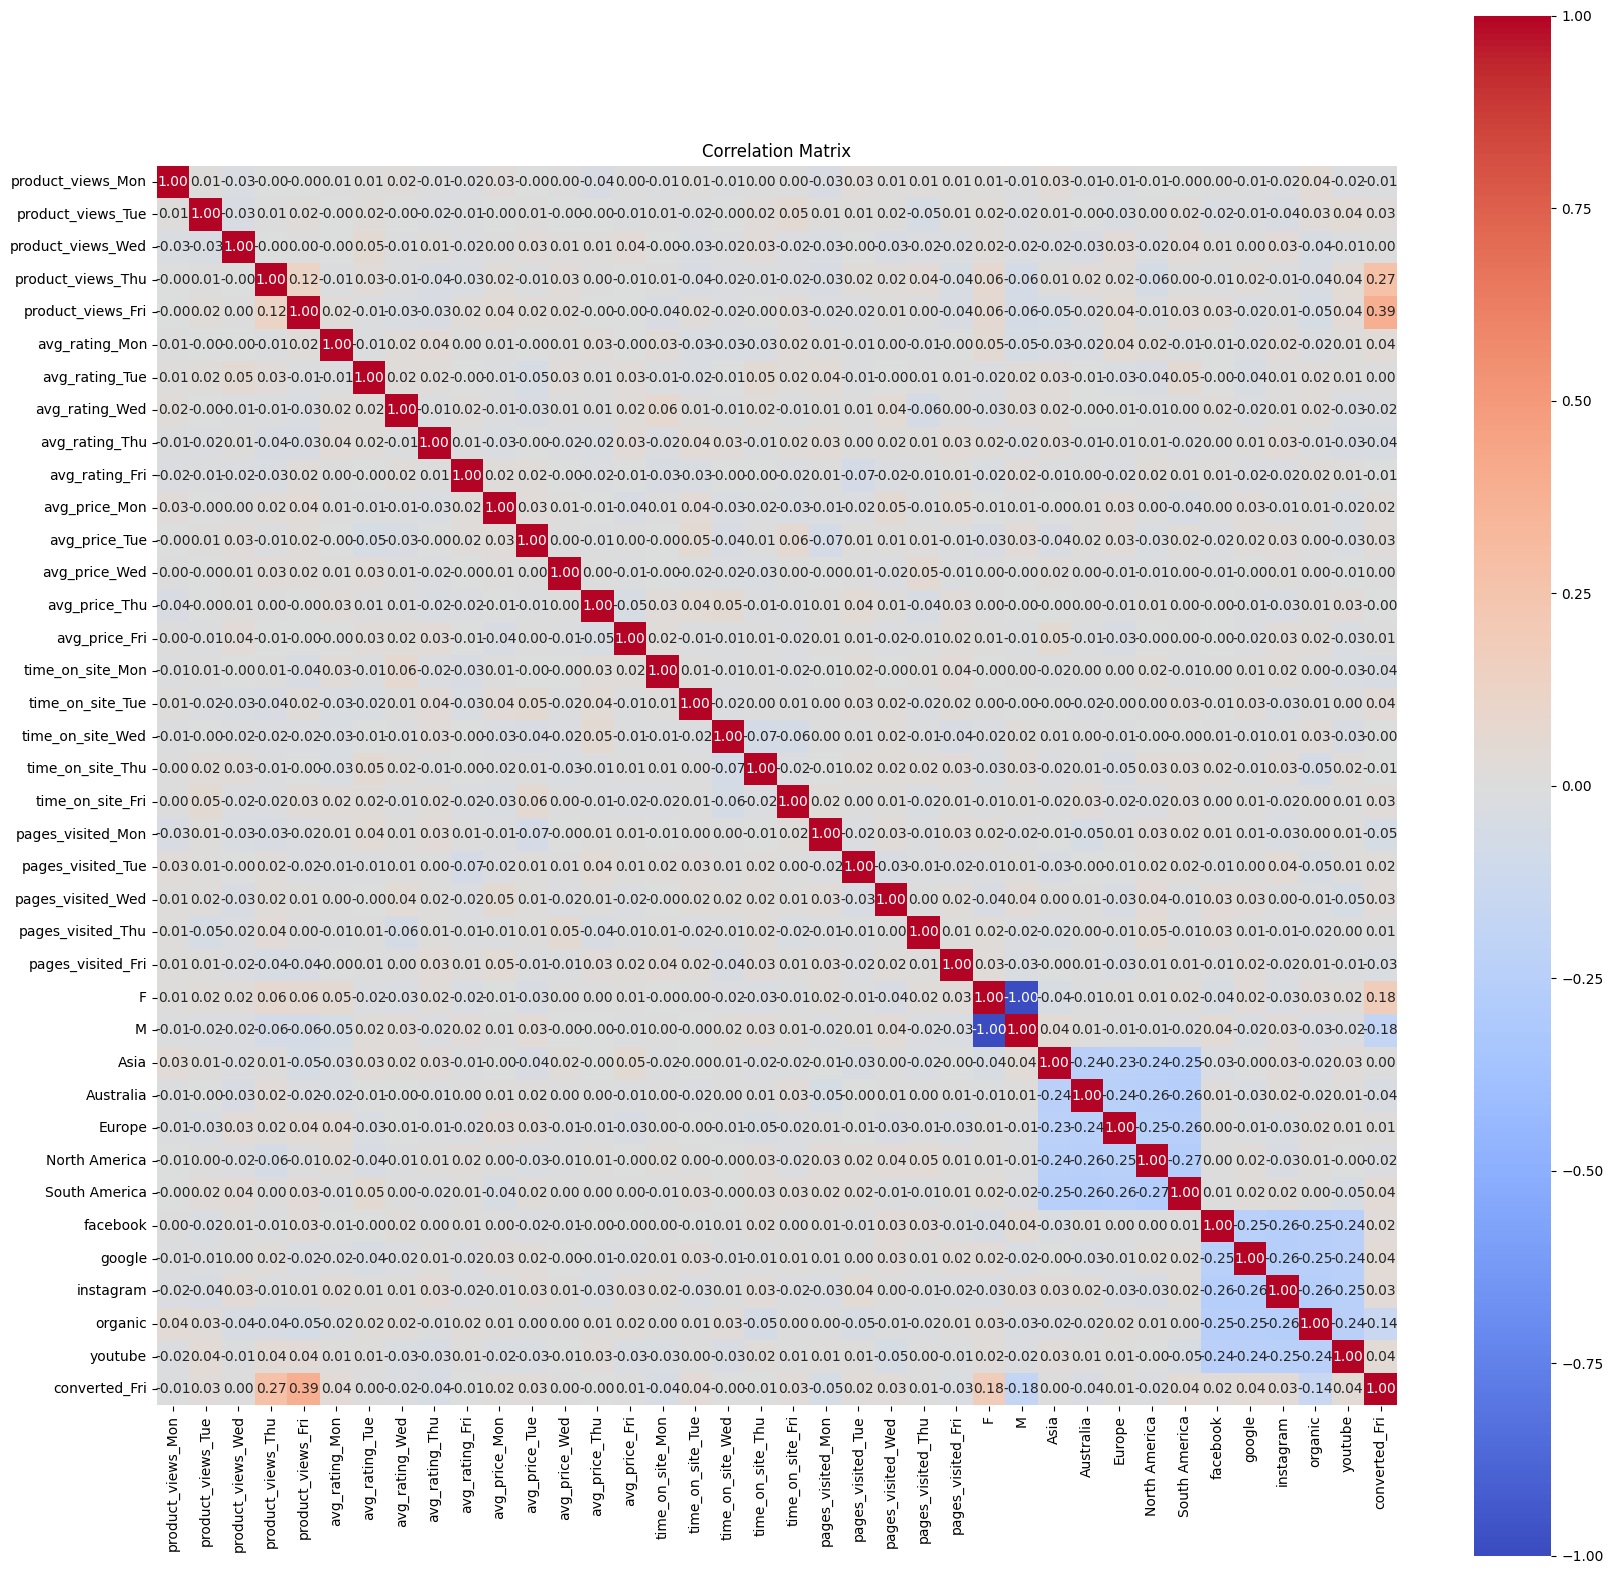

In [253]:
# Get all column names as a list
column_names = new_df.columns.tolist()


# Combine all column names into a single variable
correlation_matrix = new_df[column_names].corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [254]:
new_df.columns

Index(['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M', 'Asia', 'Australia',
       'Europe', 'North America', 'South America', 'facebook', 'google',
       'instagram', 'organic', 'youtube', 'converted_Fri'],
      dtype='object')

#### We can see the variables are not having a high correlation by looking at the Correlation Matrix. Therefore, the Linear Regression is not sutiable for this dataset.

## Classification Model

### Model Testing

In [255]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()

In [256]:
X = np.array(new_df.drop(columns=['converted_Fri']))
y = np.array(new_df['converted_Fri'])

In [257]:
# Assuming you have your data in X (features) and y (target) format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(new_df.iloc[:,:37], new_df.iloc[:,37])
pred = knn.predict(np.array(new_df.iloc[:,:37]))
print(accuracy_score(pred, new_df.iloc[:,37]))

0.631


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [259]:
print(accuracy_score(pred, new_df.iloc[:,37]))
print(f1_score(pred, new_df.iloc[:,37]))
print(recall_score(pred, new_df.iloc[:,37]))
print(precision_score(pred, new_df.iloc[:,37]))

0.631
0.06106870229007634
0.5714285714285714
0.03225806451612903


In [260]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [261]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [262]:
print(f1_score(y_test, pred_l))
print(f1_score(y_test, pred_nb))
print(f1_score(y_test, pred_knn))
print(f1_score(y_test, pred_svc))

0.6574394463667821
0.6533333333333332
0.02531645569620253
0.0


In [263]:
print(accuracy_score(y_test, pred_l))
print(accuracy_score(y_test, pred_nb))
print(accuracy_score(y_test, pred_knn))
print(accuracy_score(y_test, pred_svc))

0.7525
0.74
0.615
0.6125


In [264]:
print(precision_score(y_test, pred_l))
print(precision_score(y_test, pred_nb))
print(precision_score(y_test, pred_knn))
print(precision_score(y_test, pred_svc))

0.7089552238805971
0.6758620689655173
0.6666666666666666
0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
print(recall_score(y_test, pred_l))
print(recall_score(y_test, pred_nb))
print(recall_score(y_test, pred_knn))
print(recall_score(y_test, pred_svc))

0.6129032258064516
0.632258064516129
0.012903225806451613
0.0


In [272]:
print(cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc'))
print(cross_val_score(svc, X_train, y_train, cv=5, scoring='roc_auc'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[0.77458466 0.77156402 0.79228897 0.78356268 0.78194602]
[0.80886055 0.78175868 0.82782346 0.81351737 0.81638668]
[0.49691643 0.56299295 0.43253902 0.50849555 0.50387352]
[0.75964927 0.73128881 0.72168149 0.75054539 0.75175782]


In this project we will focus on whether the customer converted on Friday, therefore we are focusing on the precision score which the model can predict whether the customer converted on Friday.</br>
Since we can see that Logistic Regression Model is having the highest Precision Score, and the accuracy is also the highest (0.7525). Therefore, we are picking the Logistic Regression Modelas our best model.</br>
The reason for us to choose Precision Score over Recall is because we want to predict the customer truely converted on Friday. Besides, the reason for us choosing accuracy over F1 score is because the data we are having is balanced.</br>


In [267]:
pred_l_prob = log.predict_proba(X_test)

In [268]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

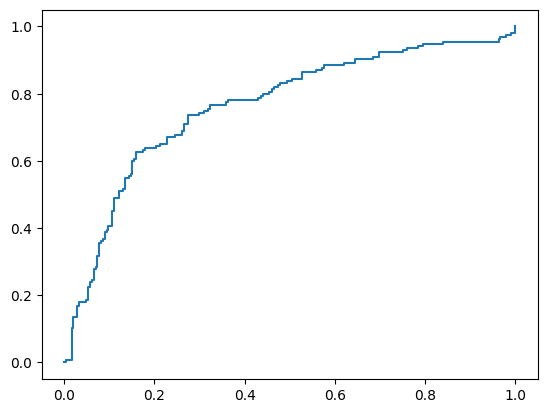

In [269]:
plt.plot(fpr, tpr)

In [278]:
new_df.columns

Index(['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M', 'Asia', 'Australia',
       'Europe', 'North America', 'South America', 'facebook', 'google',
       'instagram', 'organic', 'youtube', 'converted_Fri'],
      dtype='object')

### Logistic Regression
We want the model to focus on predicting the customer truely converted on Friday, therefore the target of the Randomsearch is Precision

In [280]:
log = LogisticRegression()
log.fit(new_df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M', 'Asia', 'Australia',
       'Europe', 'North America', 'South America', 'facebook', 'google',
       'instagram', 'organic', 'youtube']], df['converted_Fri'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [281]:
pred = log.predict(new_df[['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M', 'Asia', 'Australia',
       'Europe', 'North America', 'South America', 'facebook', 'google',
       'instagram', 'organic', 'youtube']])

In [282]:
print(accuracy_score(pred,df['converted_Fri']))
print(f1_score(pred,df['converted_Fri']))
print(precision_score(pred,df['converted_Fri']))
print(recall_score(pred,df['converted_Fri']))

0.7535
0.6445565969718817
0.6008064516129032
0.6951788491446346


In [284]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,product_views_Mon,-0.018603
1,product_views_Tue,0.013468
2,product_views_Wed,-0.001876
3,product_views_Thu,0.207247
4,product_views_Fri,0.367539
5,avg_rating_Mon,0.060796
6,avg_rating_Tue,-0.033254
7,avg_rating_Wed,-0.038651
8,avg_rating_Thu,-0.143002
9,avg_rating_Fri,-0.077258


## Explain 
### Initial Hypothesis
Product_ view_on_Thru and Product_ view_on_Fri seem to be strong predictors of the 'converted_Fri', 'Organic', and 'Gender' also strong predictors of the 'converted_Fri'.

### The final model I selected and how I know this is the best model for the problem:
In this project we will focus on whether the customer converted on Friday, therefore we are focusing on the precision score which the model can predict whether the customer converted on Friday.</br>
Since we can see that Logistic Regression Model is having the highest Precision Score, and the accuracy is also the highest (0.7525). Therefore, we are picking the Logistic Regression Modelas our best model.</br>
The reason for us to choose Precision Score over Recall is because we want to predict the customer truely converted on Friday. Besides, the reason for us choosing accuracy over F1 score is because the data we are having is balanced.</br>

### How the model should be used by the business, in business process.
In the model we can find  product_views_Thu, product_views_Fri are positively related with whether the customer converted on Friday.
Compare to Female's positively related with whether the customer converted on Friday. Male are strongly negatively related with with whether the customer converted on Friday.
Organic markrting_channel negatively related with with whether the customer converted on Friday.
